In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
#filename = './logs/2018-12-17_18-58-39-.log'
#new_file = './logs/2018-12-17_23-23-09-.log'

#filename = './logs/2019-01-12_15-29-29-.log'
#filename = './logs/2019-01-14_14-09-12-.log' # small num points
#filename = './logs/2019-01-14_17-55-31-.log' # original num points
filename = './logs/2019-01-14_23-28-29-.log' # 700 and 350 num points

In [185]:
df = pd.read_csv(filename, sep='|', header=1, skiprows=1)
df.columns = [str.strip(x) for x in df.columns]

In [186]:
print(df.shape)
df.tail()


(1095, 20)


,timestamp,epoch,batches_processed,mean_loss,segmentation_accuracy,box_IOU_ground,box_IOU_3d,box_accuracy,seg_loss,stage1_center_loss,center_loss,heading_class_loss,heading_residual_normalized_loss,size_class_loss,size_residuals_normalized_loss,corner_loss,total_loss,lr,bn_decay,flag
1090,"2019-01-15 04:06:13,957 -",72,110,3.675033,0.941229,0.763207,0.708539,0.651563,0.160159,0.209770,0.059420,0.392338,0.026927,0.000046,0.022318,0.083248,2.639114,0.000063,0.96875,Train
1091,"2019-01-15 04:06:26,839 -",72,120,4.215428,0.947588,0.759255,0.703240,0.628906,0.153888,0.303381,0.079264,0.482969,0.022645,0.000080,0.027545,0.104323,3.066623,0.000063,0.96875,Train
1092,"2019-01-15 04:06:39,702 -",72,130,4.010019,0.941984,0.765959,0.714059,0.656250,0.162695,0.541840,0.490294,0.437778,0.035201,0.000452,0.021793,0.304938,5.822331,0.000063,0.96875,Train
1093,"2019-01-15 04:06:52,562 -",72,140,4.278283,0.941135,0.763466,0.709199,0.657813,0.171866,0.488567,0.602577,0.486307,0.040249,0.000265,0.025263,0.362697,6.686791,0.000063,0.96875,Train
1094,"2019-01-15 04:07:42,641 -",72,121,7.426111,0.871448,0.713739,0.663111,0.580708,0.551637,0.435116,0.437303,0.736874,0.047414,0.000232,0.031393,0.314881,6.886124,0.000063,0.96875,Val


flag
 Train    AxesSubplot(0.125,0.125;0.775x0.755)
 Val      AxesSubplot(0.125,0.125;0.775x0.755)
Name: segmentation_accuracy, dtype: object

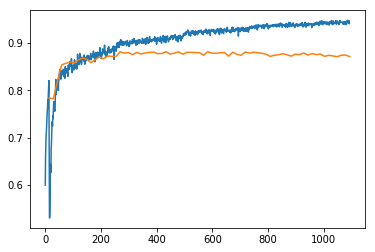

In [187]:
df.groupby('flag')['segmentation_accuracy'].plot()

flag
 Train    AxesSubplot(0.125,0.125;0.775x0.755)
 Val      AxesSubplot(0.125,0.125;0.775x0.755)
Name: box_accuracy, dtype: object

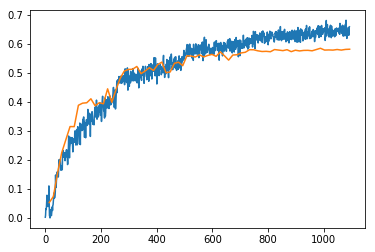

In [188]:
df.groupby('flag')['box_accuracy'].plot()

flag
 Train    AxesSubplot(0.125,0.125;0.775x0.755)
 Val      AxesSubplot(0.125,0.125;0.775x0.755)
Name: box_accuracy, dtype: object

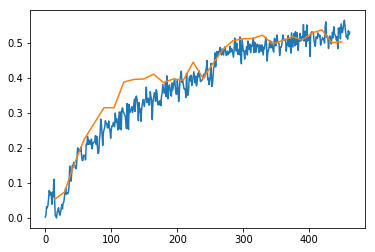

In [177]:
df.groupby('flag')['box_accuracy'].plot()

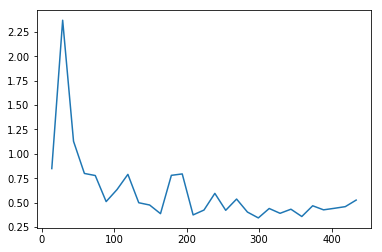

In [21]:
df[df['flag'] == ' Val']['corner_loss'].plot()

In [21]:
df.columns

Index(['timestamp', 'epoch', 'batches_processed', 'mean_loss',
       'segmentation_accuracy', 'box_IOU_ground', 'box_IOU_3d', 'box_accuracy',
       'seg_loss', 'stage1_center_loss', 'center_loss', 'heading_class_loss',
       'heading_residual_normalized_loss', 'size_class_loss',
       'size_residuals_normalized_loss', 'corner_loss', 'total_loss', 'flag'],
      dtype='object')

(687, 17)

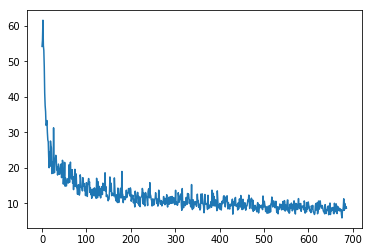

In [142]:
df2 = pd.read_csv(new_file, sep='|', header=1, skiprows=1)
#df2[' total_loss'].plot()
df2[' mean_loss '].plot()
df2.shape

In [144]:
df2.tail()

,timestamp,epoch,batches_processed,mean_loss,segmentation_accuracy,box_IOU_ground,box_IOU_3d,box_accuracy,seg_loss,stage1_center_loss,center_loss,heading_class_loss,heading_residual_normalized_loss,size_class_loss,size_residuals_normalized_loss,corner_loss,total_loss
682,"2018-12-18 00:03:42,487 -",2,2250,9.859812,0.868149,0.624431,0.574328,0.400000,0.328634,0.542452,0.637459,0.968728,0.044568,0.001012,0.038146,0.440902,8.541579
683,"2018-12-18 00:03:46,027 -",2,2260,9.919063,0.877594,0.632127,0.580285,0.365625,0.259985,0.304404,0.177861,0.886085,0.049477,0.001739,0.038216,0.205043,5.434377
684,"2018-12-18 00:03:49,576 -",2,2270,8.480699,0.871716,0.636421,0.583079,0.368750,0.306791,0.823324,0.967508,0.744066,0.042016,0.001491,0.040967,0.603307,10.535904
685,"2018-12-18 00:03:53,126 -",2,2280,9.071413,0.873398,0.642091,0.591352,0.396875,0.294886,0.717242,1.016070,0.999475,0.066391,0.003661,0.021037,0.661688,11.396776
686,"2018-12-18 00:03:56,664 -",2,2290,8.661305,0.887817,0.639921,0.591344,0.418750,0.284508,0.450626,0.328298,0.884690,0.043836,0.001239,0.026188,0.217998,5.529815


In [5]:
df.columns.values

array(['        timestamp ', ' epoch ', ' batches_processed ',
       ' mean_loss ', ' segmentation_accuracy ', ' box_IOU_ground ',
       ' box_IOU_3d ', ' box_accuracy ', ' seg_loss ',
       ' stage1_center_loss ', ' center_loss ', ' heading_class_loss ',
       ' heading_residual_normalized_loss ', ' size_class_loss ',
       ' size_residuals_normalized_loss ', ' corner_loss ', ' total_loss'],
      dtype=object)

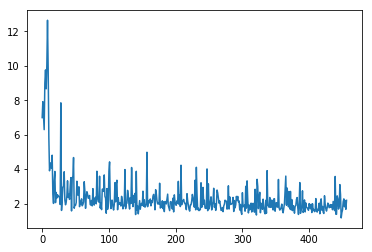

In [18]:
#df[' total_loss'].plot()
df[' stage1_center_loss '].plot()

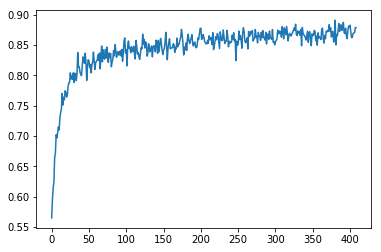

In [7]:
df[' segmentation_accuracy '].plot()

In [40]:
ref_filename = 'logs/run_train-tag-total_loss_1.csv'

In [41]:
ref_df = pd.read_csv(ref_filename)

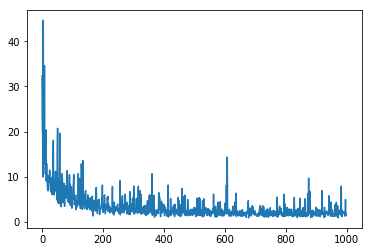

In [42]:
ref_df.Value.plot()
#ref_df

In [43]:
ref_df

,Wall time,Step,Value
0,1.543534e+09,42,32.340008
1,1.543534e+09,167,20.574242
2,1.543534e+09,229,19.340101
3,1.543534e+09,234,9.970661
4,1.543534e+09,474,44.660362
5,1.543534e+09,536,14.441819
6,1.543534e+09,579,12.768376
7,1.543534e+09,586,15.335401
8,1.543534e+09,634,34.565769
9,1.543534e+09,647,12.844904
